In [1]:
import pandas as pd
import plotly.express as px
# Replace 'file.csv' with the path to your CSV file
df = pd.read_csv('1/tingkat-inflasi-bulan-ke-bulan-provinsi-aceh.csv', delimiter=';')

# Display the first few rows of the DataFrame
print(df.head())


   bps_kode_provinsi bps_nama_provinsi  tahun     bulan  \
0                 11              Aceh   2014   Januari   
1                 11              Aceh   2014  Februari   
2                 11              Aceh   2014     Maret   
3                 11              Aceh   2014     April   
4                 11              Aceh   2014       Mei   

   tingkat_inflasi_bulanan  satuan  
0                     1.85  Persen  
1                    -0.45  Persen  
2                    -0.52  Persen  
3                    -0.15  Persen  
4                     0.86  Persen  


In [2]:
df.describe

<bound method NDFrame.describe of      bps_kode_provinsi bps_nama_provinsi  tahun      bulan  \
0                   11              Aceh   2014    Januari   
1                   11              Aceh   2014   Februari   
2                   11              Aceh   2014      Maret   
3                   11              Aceh   2014      April   
4                   11              Aceh   2014        Mei   
..                 ...               ...    ...        ...   
115                 11              Aceh   2023    Agustus   
116                 11              Aceh   2023  September   
117                 11              Aceh   2023    Oktober   
118                 11              Aceh   2023   November   
119                 11              Aceh   2023   Desember   

     tingkat_inflasi_bulanan  satuan  
0                       1.85  Persen  
1                      -0.45  Persen  
2                      -0.52  Persen  
3                      -0.15  Persen  
4                       0.

In [3]:
missing_values = df.isnull().sum()

# print(f"Are there any missing values in the DataFrame? {has_missing_values}")
missing_values

bps_kode_provinsi          0
bps_nama_provinsi          0
tahun                      0
bulan                      0
tingkat_inflasi_bulanan    1
satuan                     0
dtype: int64

In [4]:
df['tingkat_inflasi_bulanan'].fillna(df['tingkat_inflasi_bulanan'].mean(), inplace=True)

In [5]:
missing_values = df.isnull().sum()

# print(f"Are there any missing values in the DataFrame? {has_missing_values}")
missing_values

bps_kode_provinsi          0
bps_nama_provinsi          0
tahun                      0
bulan                      0
tingkat_inflasi_bulanan    0
satuan                     0
dtype: int64

In [9]:
df = pd.DataFrame(df)

# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)

print("CSV file has been saved.")

df.to_csv('final-tingkat-inflasi-bulan-ke-bulan-provinsi-aceh.csv', index=False)

CSV file has been saved.


In [ ]:
import plotly.express as px
import pandas as pd

# Example data
data = {
    'tahun': [2014]*12,
    'bulan': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'tingkat_inflasi_bulanan': [0.3, 0.5, 0.7, 0.6, 0.8, 0.4, 0.9, 1.2, 1.0, 0.7, 0.6, 0.4],
    'province': ['Province A']*12
}

df = pd.DataFrame(data)

# Calculate Moving Average
df['moving_avg'] = df['tingkat_inflasi_bulanan'].rolling(window=3).mean()

# Create the line chart with moving average
fig = px.line(
    df, 
    x='bulan', 
    y=['tingkat_inflasi_bulanan', 'moving_avg'], 
    title='Monthly Inflation Rate in 2014 by Province',
    labels={'bulan': 'Month', 'value': 'Inflation Rate (%)'},
    markers=True,
    line_shape='linear',
)

# Add annotations for key points
fig.add_annotation(x='Aug', y=1.2, text="Highest inflation", showarrow=True, arrowhead=1)

# Show the plot
fig.show()


In [15]:
# Filter the data to show only the year 2014
df_2014 = df[df['tahun'] == 2014]
df_2015 = df[df['tahun'] == 2015]


# df_2015
# # Concatenate the two dataframes
df_combined = pd.concat([df_2014, df_2015])
# df_combined
# # Calculate the moving average for the combined dataframe
df_combined['moving_avg'] = df_combined['tingkat_inflasi_bulanan'].rolling(window=3).mean()

# df_combined['moving_avg']
# Split the combined dataframe back into the original years if needed
df_2014 = df_combined[df_combined['tahun'] == 2014]
df_2015 = df_combined[df_combined['tahun'] == 2015]
# Create the line chart with the filtered data for 2014
fig = px.line(
    df_2015, 
    x='bulan', 
    y=['tingkat_inflasi_bulanan', 'moving_avg'],
    title='Monthly Inflation Rate in 2015 by Province',
    labels={'bulan': 'Month', 'value': 'Inflation Rate (%)'},
    markers=True,
    line_shape='linear',
)

# # Add annotations for key points (optional)
# fig.add_annotation(x='Aug', y=1.2, text="Highest inflation", showarrow=True, arrowhead=1)

# Show the plot
fig.show()

In [12]:
# Filter data for the end of 2013 and the whole of 2014
df_2013_2014 = df[(df['tahun'] == 2014) & (df['bulan'].isin(['Oktober', 'November', 'Desember'])) | (df['tahun'] == 2015)]

# Calculate Moving Average using values from the end of 2013 and 2014
df_2013_2014['moving_avg'] = df_2013_2014['tingkat_inflasi_bulanan'].rolling(window=3).mean()

# Filter again to only include data from 2014 for visualization
df_2014 = df_2013_2014[df_2013_2014['tahun'] == 2015]

fig = px.line(
    df, 
    x='bulan', 
    y='tingkat_inflasi_bulanan', # Color lines by province
    title='Monthly Inflation Rate in 2014 by Province',
    labels={'bulan': 'Month', 'tingkat_inflasi_bulanan': 'Inflation Rate (%)'},
    markers=True,
    line_shape='linear',
)

# Show the chart
fig.show()

/home/farhan/miniconda3/envs/tumbal/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
df_2013_2014

,bps_kode_provinsi,bps_nama_provinsi,tahun,bulan,tingkat_inflasi_bulanan,satuan,moving_avg
0,11,Aceh,2014,Januari,1.850000,Persen,NaN
1,11,Aceh,2014,Februari,-0.450000,Persen,NaN
2,11,Aceh,2014,Maret,-0.520000,Persen,0.293333
3,11,Aceh,2014,April,-0.150000,Persen,-0.373333
4,11,Aceh,2014,Mei,0.860000,Persen,0.063333
5,11,Aceh,2014,Juni,0.400000,Persen,0.370000
6,11,Aceh,2014,Juli,1.230000,Persen,0.830000
7,11,Aceh,2014,Agustus,0.060000,Persen,0.563333
8,11,Aceh,2014,September,0.470000,Persen,0.586667
9,11,Aceh,2014,Oktober,0.380000,Persen,0.303333


In [7]:
import pandas as pd
import plotly.express as px



# Create a line chart
# fig = px.line(
#     df, 
#     x='bulan', 
#     y='tingkat_inflasi_bulanan', 
#     title='Monthly Inflation Rate in 2014',
#     labels={'bulan': 'Month', 'tingkat_inflasi_bulanan': 'Inflation Rate (%)'},
#     markers=True,
#     line_shape='linear',
# )

# If you want to separate lines for each province
fig = px.line(
    df, 
    x='tahun', 
    y='tingkat_inflasi_bulanan', 
    color='bulan', 
    title='Monthly Inflation Rate in 2014 by Province',
    labels={'bulan': 'Month', 'tingkat_inflasi_bulanan': 'Inflation Rate (%)'},
    markers=True,
    line_shape='linear',
)

# Show the chart
fig.show()


In [6]:
df = pd.DataFrame(df)

In [10]:
# Filter the data to show only the year 2014
df_2014 = df[df['tahun'] == 2014]

# Calculate Moving Average (optional)
df_2014['moving_avg'] = df_2014['tingkat_inflasi_bulanan'].rolling(window=3).mean()

# Create the line chart with the filtered data for 2014
fig = px.line(
    df_2014, 
    x='bulan', 
    y=['tingkat_inflasi_bulanan', 'moving_avg'],
    title='Monthly Inflation Rate in 2014 by Province',
    labels={'bulan': 'Month', 'value': 'Inflation Rate (%)'},
    markers=True,
    line_shape='linear',
)

# Add annotations for key points (optional)
fig.add_annotation(x='Aug', y=1.2, text="Highest inflation", showarrow=True, arrowhead=1)

# Show the plot
fig.show()

/home/farhan/miniconda3/envs/tumbal/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
df_2014.describe()

,tahun,tingkat_inflasi_bulanan,moving_avg
count,12.0,12.000000,10.000000
mean,2014.0,0.675000,0.726667
std,0.0,0.266714,0.174837
min,2014.0,0.300000,0.500000
25%,2014.0,0.475000,0.600000
50%,2014.0,0.650000,0.700000
75%,2014.0,0.825000,0.816667
max,2014.0,1.200000,1.033333


In [8]:
import plotly.express as px
import pandas as pd

# Example data
data = {
    'tahun': [2014]*12,
    'bulan': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'tingkat_inflasi_bulanan': [0.3, 0.5, 0.7, 0.6, 0.8, 0.4, 0.9, 1.2, 1.0, 0.7, 0.6, 0.4],
    'province': ['Province A']*12
}

df = pd.DataFrame(data)

# Calculate Moving Average
df['moving_avg'] = df['tingkat_inflasi_bulanan'].rolling(window=3).mean()

# Create the line chart with moving average
fig = px.line(
    df, 
    x='bulan', 
    y=['tingkat_inflasi_bulanan', 'moving_avg'], 
    title='Monthly Inflation Rate in 2014 by Province',
    labels={'bulan': 'Month', 'value': 'Inflation Rate (%)'},
    markers=True,
    line_shape='linear',
)

# Add annotations for key points
fig.add_annotation(x='Aug', y=1.2, text="Highest inflation", showarrow=True, arrowhead=1)

# Show the plot
fig.show()


In [7]:
!pip install nbformat 


/home/farhan/miniconda3/envs/tumbal/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/farhan/miniconda3/envs/tumbal/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/farhan/miniconda3/envs/tumbal/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/farhan/miniconda3/envs/tumbal/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted inflation for the next month: 0.37%


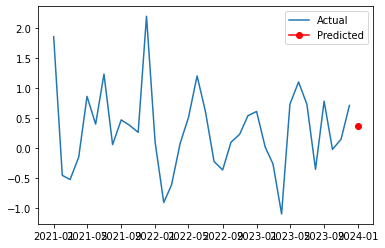

In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Data input as a dictionary (for demonstration)
data = {
    'Bulan': ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember',
              'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember',
              'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],
    'Tingkat_Inflasi_Bulanan': [1.85, -0.45, -0.52, -0.15, 0.86, 0.4, 1.23, 0.06, 0.47, 0.38, 0.2635, 2.19,
                                0.1, -0.9, -0.61, 0.08, 0.51, 1.2, 0.61, -0.22, -0.36, 0.1, 0.23, 0.54,
                                0.61, 0.02, -0.26, -1.09, 0.73, 1.1, 0.73, -0.35, 0.78, -0.02, 0.15, 0.71]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Map Indonesian months to English
month_map = {
    'Januari': 'January', 'Februari': 'February', 'Maret': 'March', 'April': 'April', 'Mei': 'May',
    'Juni': 'June', 'Juli': 'July', 'Agustus': 'August', 'September': 'September', 'Oktober': 'October',
    'November': 'November', 'Desember': 'December'
}
df['Bulan'] = df['Bulan'].map(month_map)

# Create a datetime index for the data
years = [2021] * 12 + [2022] * 12 + [2023] * 12  # Adjust years based on your actual data
months = pd.to_datetime(df['Bulan'] + ' ' + pd.Series(years).astype(str))

df['Date'] = months
df.set_index('Date', inplace=True)

# Fit the ARIMA model
model = ARIMA(df['Tingkat_Inflasi_Bulanan'], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Predict inflation for the next month
next_month_prediction = model_fit.forecast(steps=1)

# Print the prediction
print(f"Predicted inflation for the next month: {next_month_prediction[0]:.2f}%")

# Optional: Plot the actual vs predicted values
plt.plot(df.index, df['Tingkat_Inflasi_Bulanan'], label='Actual')
plt.plot(df.index[-1] + pd.DateOffset(months=1), next_month_prediction, marker='o', label='Predicted', color='red')
plt.legend()
plt.show()


In [13]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objs as go

# Load the dataset from a CSV file
df = pd.read_csv('1/final-tingkat-inflasi-bulan-ke-bulan-provinsi-aceh.csv')

# Map Indonesian months to English
month_map = {
    'Januari': 'January', 'Februari': 'February', 'Maret': 'March', 'April': 'April', 'Mei': 'May',
    'Juni': 'June', 'Juli': 'July', 'Agustus': 'August', 'September': 'September', 'Oktober': 'October',
    'November': 'November', 'Desember': 'December'
}
df['bulan'] = df['bulan'].map(month_map)

# Combine 'tahun' and 'bulan' to form a datetime index
df['Date'] = pd.to_datetime(df['bulan'] + ' ' + df['tahun'].astype(str))
df.set_index('Date', inplace=True)

# Fit the ARIMA model using all data
model = ARIMA(df['tingkat_inflasi_bulanan'], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Predict inflation for the next 5 months
next_5_months_prediction = model_fit.forecast(steps=6)
print(f"Predicted inflation for the next 5 months: {next_5_months_prediction}")

# Filter data for the year 2023
df_2023 = df[df['tahun'] == 2023]

# Create a new date range for the next 5 months, starting from the 1st of each month
future_dates = pd.date_range(start=df_2023.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')

# Create traces for the actual and predicted values
actual_trace = go.Scatter(x=df_2023.index, y=df_2023['tingkat_inflasi_bulanan'], mode='lines+markers', name='Actual 2023')
predicted_trace = go.Scatter(x=future_dates, y=next_5_months_prediction, mode='lines+markers', name='Predicted', marker=dict(color='red'))

# Create the layout
layout = go.Layout(
    title='Inflation Rate for 2023 and Next 5 Months',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Inflation Rate (%)')
)

# Create the figure and add the traces
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)

# Show the plot
fig.show()



/home/farhan/miniconda3/envs/tumbal/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/home/farhan/miniconda3/envs/tumbal/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/home/farhan/miniconda3/envs/tumbal/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Predicted inflation for the next 5 months: 2024-01-01    0.239718
2024-02-01    0.261740
2024-03-01    0.264979
2024-04-01    0.265455
2024-05-01    0.265525
2024-06-01    0.265536
Freq: MS, Name: predicted_mean, dtype: float64
